# Analysis Code
Here is where I conduct my data analysis
### Frances Harrington, frh19@pitt.edu, 5/2/2021
### Table of Contents:
- [Importing relevant items](##import-relevant-items)
- [Initial data overview](##here's-some-of-the-data:)
- [Seperation by style](##let's-work-on-seperating-works-by-style-(prose-or-poetry):)
- [Combining the two DataFrames](##below-I'm-going-to-add-the-aspects-of-ne_df-to-latlib_df-for-easier-analysis:)
- [Era split](##let's-split-life-spans-into-actual-eras-(Golden-Age,-Silver-Age,-Later):)
- [Sword word analysis](##sword-word-analysis)
- [Final stats look and updated examples](##final-stat-overview-&-save-updated-examples-out:)

## import relevant items:

In [1]:
import nltk
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

In [2]:
import string
from nltk import ngrams

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
import statistics

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
latlib_df = pd.read_pickle("/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/data/latinlibrary_data.pkl")

In [7]:
ne_df = pd.read_pickle("/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/data/latinlibrary_ne_data.pkl")

## here's some of the data:

In [8]:
latlib_df.head()

,title,text,text_raw,tokens,token_count
0,Seneca the Elder,L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERSI...,[L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERS...,"[L, ANNAEI, SENECAE, MAIORIS, EXCERPTA, CONTRO...",1768
1,Tibullus Book III,LIBER TERTIVS LYGDAMI ALIORVMQUE ELEGIAE Mar...,"[LIBER TERTIVS LYGDAMI ALIORVMQUE ELEGIAE, \n,...","[LIBER, TERTIVS, LYGDAMI, ALIORVMQUE, ELEGIAE,...",4395
2,Tibullus Book II,A. TIBVLLI ELEGIAE LIBER SECVNDVS Quisquis a...,"[A. TIBVLLI ELEGIAE LIBER SECVNDVS, \n, \n, \n...","[A, TIBVLLI, ELEGIAE, LIBER, SECVNDVS, Quisqui...",2747
3,Seneca the Elder,L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERSI...,[L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERS...,"[L, ANNAEI, SENECAE, MAIORIS, EXCERPTA, CONTRO...",1933
4,Statius: Achilleid II,PVBLIVS PAPINIVS STATIVS ACHILLEID II Exuit im...,"[PVBLIVS PAPINIVS STATIVS, \nACHILLEID II\n, \...","[PVBLIVS, PAPINIVS, STATIVS, ACHILLEID, II, Ex...",1075


In [9]:
ne_df.head()

,name,era
0,ALBIVS TIBVLLVS,(c. 54 – 19 B.C.)
1,L. ANNAEVS SENECA MAIOR,(54 B.C. – 39 A.D.)
2,SVLPICIA,(late 1st century B.C.)
3,PVBLIVS PAPINIVS STATIVS,(c. 45 – 96 A.D.)
4,C. SALLVSTIVS CRISPVS,(86 – 34 B.C.)


Here's some basic info on the data contained in latlib_df:

In [10]:
#overall shape of the dataframe:
latlib_df.shape

(673, 5)

In [11]:
latlib_df.describe()

,token_count
count,673.000000
mean,5273.719168
std,4614.407803
min,0.000000
25%,1434.000000
50%,4691.000000
75%,7257.000000
max,30592.000000


In [12]:
latlib_df.info()
#good! no null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        673 non-null    object
 1   text         673 non-null    object
 2   text_raw     673 non-null    object
 3   tokens       673 non-null    object
 4   token_count  673 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 26.4+ KB


## let's work on seperating works by style (prose or poetry):

In [13]:
#use Aeneid (P. VERGILI MARONIS AENEIDOS) + Ovid's Metamorphoses (P. OVIDI NASONIS METAMORPHOSEON) for verse examples

In [14]:
metamorphoses_ovid = latlib_df[latlib_df['text'].str.contains('P. OVIDI NASONIS METAMORPHOSEON')]

In [15]:
aeneid = latlib_df[latlib_df['text'].str.contains('P. VERGILI MARONIS AENEIDOS')]

In [16]:
aeneid

,title,text,text_raw,tokens,token_count
608,P. VERGILI MARONIS AENEIDOS LIBER DVODECIMVS,P. VERGILI MARONIS AENEIDOS LIBER DVODECIMVS ...,[P. VERGILI MARONIS AENEIDOS LIBER DVODECIMVS\...,"[P, VERGILI, MARONIS, AENEIDOS, LIBER, DVODECI...",6201
609,P. VERGILI MARONIS AENEIDOS LIBER DECIMVS,P. VERGILI MARONIS AENEIDOS LIBER DECIMVS Pan...,"[P. VERGILI MARONIS AENEIDOS LIBER DECIMVS\n, ...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, DECIMVS...",5905
610,P. VERGILI MARONIS AENEIDOS LIBER NONVS,P. VERGILI MARONIS AENEIDOS LIBER NONVS Atque...,"[P. VERGILI MARONIS AENEIDOS LIBER NONVS\n, \n...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, NONVS, ...",5300
611,P. VERGILI MARONIS AENEIDOS LIBER OCTAVVS,P. VERGILI MARONIS AENEIDOS LIBER OCTAVVS Ut ...,[P. VERGILI MARONIS AENEIDOS LIBER OCTAVVS\n\n...,"[P, VERGILI, MARONIS, AENEIDOS, LIBER, OCTAVVS...",4639
612,P. VERGILI MARONIS AENEIDOS LIBER SEPTIMVS,P. VERGILI MARONIS AENEIDOS LIBER SEPTIMVS Tu...,"[P. VERGILI MARONIS AENEIDOS LIBER SEPTIMVS\n,...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, SEPTIMV...",5224
613,P. VERGILI MARONIS AENEIDOS LIBER VNDECIMVS,P. VERGILI MARONIS AENEIDOS LIBER VNDECIMVS O...,[P. VERGILI MARONIS AENEIDOS LIBER VNDECIMVS\n...,"[P, VERGILI, MARONIS, AENEIDOS, LIBER, VNDECIM...",5923
614,Aeneid IV,P. VERGILI MARONIS AENEIDOS LIBER QVARTVS At ...,"[P. VERGILI MARONIS AENEIDOS LIBER QVARTVS\n, ...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, QVARTVS...",4580
615,P. VERGILI MARONIS AENEIDOS LIBER SEXTVS,P. VERGILI MARONIS AENEIDOS LIBER SEXTVS Sic ...,"[P. VERGILI MARONIS AENEIDOS LIBER SEXTVS\n, \...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, SEXTVS,...",5856
616,P. VERGILI MARONIS AENEIDOS LIBER QVINTVS,P. VERGILI MARONIS AENEIDOS LIBER QVINTVS Int...,"[P. VERGILI MARONIS AENEIDOS LIBER QVINTVS\n, ...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, QVINTVS...",5565
617,P. VERGILI MARONIS AENEIDOS LIBER SECVNDVS,P. VERGILI MARONIS AENEIDOS LIBER SECVNDVS Co...,"[P. VERGILI MARONIS AENEIDOS LIBER SECVNDVS\n,...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, SECVNDV...",5178


In [17]:
[len(x) for x in aeneid.text_raw]
#this gets me how many lines per-work there are 

[964, 920, 825, 741, 833, 924, 715, 905, 880, 811, 767, 727]

In [18]:
count = 0
for i in aeneid.text_raw:
    count += len(i)
print(count) #this is how many lines are in the aeneid in total

10012


In [19]:
def MaxLineLength(l):
    return(len(max(l, key=len)))

In [20]:
max(aeneid.text_raw.map(MaxLineLength))
#so the longest line is 87 characters long, that's my threshold for a verse line (depending on Ovid I guess)

87

In [21]:
max(metamorphoses_ovid.text_raw.map(MaxLineLength)) #yep, 87 it is!

81

now to actually use that number to quantify prose v. verse!

In [22]:
latlib_df['max_line_length'] = latlib_df.text_raw.map(MaxLineLength)

In [23]:
latlib_df.head(5)

,title,text,text_raw,tokens,token_count,max_line_length
0,Seneca the Elder,L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERSI...,[L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERS...,"[L, ANNAEI, SENECAE, MAIORIS, EXCERPTA, CONTRO...",1768,2045
1,Tibullus Book III,LIBER TERTIVS LYGDAMI ALIORVMQUE ELEGIAE Mar...,"[LIBER TERTIVS LYGDAMI ALIORVMQUE ELEGIAE, \n,...","[LIBER, TERTIVS, LYGDAMI, ALIORVMQUE, ELEGIAE,...",4395,70
2,Tibullus Book II,A. TIBVLLI ELEGIAE LIBER SECVNDVS Quisquis a...,"[A. TIBVLLI ELEGIAE LIBER SECVNDVS, \n, \n, \n...","[A, TIBVLLI, ELEGIAE, LIBER, SECVNDVS, Quisqui...",2747,56
3,Seneca the Elder,L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERSI...,[L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERS...,"[L, ANNAEI, SENECAE, MAIORIS, EXCERPTA, CONTRO...",1933,1165
4,Statius: Achilleid II,PVBLIVS PAPINIVS STATIVS ACHILLEID II Exuit im...,"[PVBLIVS PAPINIVS STATIVS, \nACHILLEID II\n, \...","[PVBLIVS, PAPINIVS, STATIVS, ACHILLEID, II, Ex...",1075,71


In [24]:
latlib_df.drop(latlib_df.index[latlib_df['token_count']<=10], inplace=True)


In [25]:
def Poems(l):
    if l <= 87:
        return('verse')
    else:
        return('prose')


In [26]:
latlib_df['style'] = latlib_df.max_line_length.map(Poems)

here's a visual look at the split:

In [27]:
p_n = len(latlib_df[latlib_df['style']=='prose'])/len(latlib_df)*100
v_n = len(latlib_df[latlib_df['style']=='verse'])/len(latlib_df)*100
labels = "Prose", "Verse"
nums = [p_n, v_n]

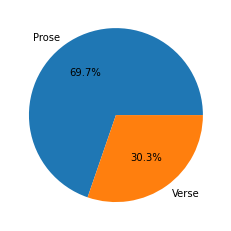

<Figure size 432x288 with 0 Axes>

In [28]:
plt.pie(nums, labels=labels, autopct='%1.1f%%')
plt.show()
plt.savefig('/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/Images/pv_whole_split.png')

## below I'm going to add the aspects of ne_df to latlib_df for easier analysis:

In [29]:
ne_df['name'] = [w[:-2] for w in ne_df.name]

In [30]:
def MatchName(l):
    for name in ne_df.name:
        last_word = name.split()[len(name.split()) - 1]
        if last_word in l:
            return name
            return "None"

In [31]:
latlib_df['author'] = latlib_df.text.map(MatchName)

to put the eras in the main df it's not going to be elegant, but I want to move on with my analysis so I'm going to merge the info into a new column for an easier method:

In [32]:
ne_df['merged'] = ne_df['era']+ne_df['name']

In [33]:
def MatchEra(l):
    for x in ne_df.merged:
        last_word = x.split()[len(x.split()) - 1]
        if last_word in l:
            clean = re.compile(r'\)\w* \w* \w*|\)\w* \w*|\)\w+\. \w* \w*|\)\w+|\(')
            return(clean.sub(' ', x))
        

In [34]:
latlib_df['life_span'] = latlib_df.text.map(MatchEra)

In [35]:
latlib_df = latlib_df.fillna('none') #just in case, I think there's some Suetonius that's wonky

That wasn't very pretty, but it did the trick and now the df itself looks nice!

In [36]:
latlib_df.sample(5)

,title,text,text_raw,tokens,token_count,max_line_length,style,author,life_span
93,"Silius, Liber XVII",SILIUS ITALICUS PUNICA LIBER DECIMUS SEPTIMUS ...,"[SILIUS ITALICUS, PUNICA LIBER DECIMUS SEPTIMU...","[SILIUS, ITALICUS, PUNICA, LIBER, DECIMUS, SEP...",4142,83,verse,SILIVS ITALIC,25/6 – 101 A.D.
634,Ammianus: Liber XXVII,AMMIANI MARCELLINI HISTORIAE LIBER XXVII ...,"[AMMIANI MARCELLINI HISTORIAE LIBER XXVII\n, \...","[AMMIANI, MARCELLINI, HISTORIAE, LIBER, XXVII,...",6242,881,prose,P. VERGILIVS MA,70 – 19 B.C.
466,Martial II,M. VALERI MARTIALIS EPIGRAMMATON LIBER II Vale...,"[M. VALERI MARTIALIS EPIGRAMMATON LIBER II\n, ...","[M, VALERI, MARTIALIS, EPIGRAMMATON, LIBER, II...",3486,804,prose,P. VERGILIVS MA,70 – 19 B.C.
425,Livy: Book XLV,TITI LIVI AB VRBE CONDITA LIBER XLV ...,"[TITI LIVI AB VRBE CONDITA LIBER XLV\n\n, \t...","[TITI, LIVI, AB, VRBE, CONDITA, LIBER, XLV, Vi...",13268,3769,prose,T. LIVI,59 B.C. – A.D. 17 . LIVI
52,"Pliny the Elder: Natural History, Book I",C. PLINII NATVRALIS HISTORIAE LIBER I [1]An ...,"[C. PLINII NATVRALIS HISTORIAE LIBER I\n, \n, ...","[C, PLINII, NATVRALIS, HISTORIAE, LIBER, I, 1,...",17293,759,prose,P. OVIDIVS NA,43 B.C. – 17 A.D.


## let's split life spans into actual eras (Golden Age, Silver Age, Later):

In [37]:
def SortEra(l):
    if 'B.C.' in l and 'A.D.' not in l:
        return('Golden Age')
    elif 'A.D.' in l and 'B.C.' not in l:
        if 'century' in l:
            if '3' in l or '4' in l:
                return('Later')
            elif '1' in l or '2' in l:
                return('Silver Age')
        elif 'century' not in l:
            if '404' in l or '180' in l: #this does feel kind of like cheating but tbh I just needed something to work
                return('Later')
            else:
                return("Silver Age")
    elif 'B.C.' in l and 'A.D.' in l:
        return('Gold and Silver Ages')

        #return('silver and later')
    else:
        return('none')

In [38]:
latlib_df['era'] = latlib_df.life_span.map(SortEra)

Here's a visual representation of the era split:

In [39]:
labelsera = "Golden Age", "Silver Age", "Later", "Gold and Silver Ages"
G = len(latlib_df[latlib_df.era=='Golden Age'])
S = len(latlib_df[latlib_df.era=='Silver Age'])
L = len(latlib_df[latlib_df.era=='Later'])
GaS = len(latlib_df[latlib_df.era=='Gold and Silver Ages'])
numsera = [G, S, L, GaS]

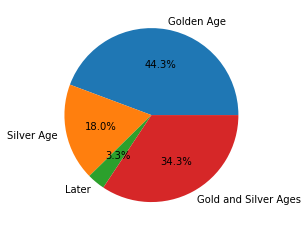

<Figure size 432x288 with 0 Axes>

In [40]:
plt.pie(numsera, labels=labelsera, autopct='%1.1f%%')
plt.show()
plt.savefig('/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/Images/era_split.png')

## sword word analysis:

In [41]:
#latlib_df['term'] = ''

In [42]:
#gladius:
gladius = latlib_df[(latlib_df.text.str.contains(pat = 'gladius', case=False)) | (latlib_df.text.str.contains(pat = 'gladii', case=False)) | (latlib_df.text.str.contains(pat = 'gladi', case=False)) | (latlib_df.text.str.contains(pat = 'gladio', case=False)) | (latlib_df.text.str.contains(pat = 'gladium', case=False)) | (latlib_df.text.str.contains(pat = 'gladie', case=False)) | (latlib_df.text.str.contains(pat = 'gladiorum', case=False)) | (latlib_df.text.str.contains(pat = 'gladiis', case=False)) | (latlib_df.text.str.contains(pat = 'gladios', case=False))]

In [43]:
#ferrum:
ferrum = latlib_df[(latlib_df.text.str.contains(pat = 'ferrum', case=False)) | (latlib_df.text.str.contains(pat = 'ferri', case=False)) | (latlib_df.text.str.contains(pat = 'ferro', case=False)) | (latlib_df.text.str.contains(pat = 'ferra', case=False)) | (latlib_df.text.str.contains(pat = 'ferrorum', case=False)) | (latlib_df.text.str.contains(pat = 'ferris', case=False))]

In [44]:
#mucro:
mucro = latlib_df[(latlib_df.text.str.contains(pat = 'mucro', case=False)) | (latlib_df.text.str.contains(pat = 'mucronis', case=False)) | (latlib_df.text.str.contains(pat = 'mucroni', case=False)) | (latlib_df.text.str.contains(pat = 'mucronem', case=False)) | (latlib_df.text.str.contains(pat = 'mucrone', case=False)) | (latlib_df.text.str.contains(pat = 'mucrones', case=False)) | (latlib_df.text.str.contains(pat = 'mucronum', case=False)) | (latlib_df.text.str.contains(pat = 'mucronibus', case=False))]

In [45]:
#ensis:
ensis = latlib_df[(latlib_df.text.str.contains(pat = 'ensis', case=False)) | (latlib_df.text.str.contains(pat = 'ensi', case=False)) | (latlib_df.text.str.contains(pat = 'ensem', case=False)) | (latlib_df.text.str.contains(pat = 'ense', case=False)) | (latlib_df.text.str.contains(pat = 'enses', case=False)) | (latlib_df.text.str.contains(pat = 'ensium', case=False)) | (latlib_df.text.str.contains(pat = 'ensibus', case=False))]

In [46]:
#capulus:
capulus = latlib_df[(latlib_df.text.str.contains(pat = 'capulus', case=False)) | (latlib_df.text.str.contains(pat = 'capuli', case=False)) | (latlib_df.text.str.contains(pat = 'capulo', case=False)) | (latlib_df.text.str.contains(pat = 'capulum', case=False)) | (latlib_df.text.str.contains(pat = 'capulorum', case=False)) | (latlib_df.text.str.contains(pat = 'capulis', case=False)) | (latlib_df.text.str.contains(pat = 'capulos', case=False))]

In [47]:
#let's see how many occurences of each word there are:
print('gladius: ',len(gladius))
print('ferrum: ',len(ferrum))
print('mucro: ',len(mucro))
print('ensis: ',len(ensis))
print('capulus: ',len(capulus)) #'capulus' is the least common, only appearing 48 times, let's look at that data!

gladius:  278
ferrum:  463
mucro:  90
ensis:  574
capulus:  48


In [48]:
capulus.head()

,title,text,text_raw,tokens,token_count,max_line_length,style,author,life_span,era
4,Statius: Achilleid II,PVBLIVS PAPINIVS STATIVS ACHILLEID II Exuit im...,"[PVBLIVS PAPINIVS STATIVS, \nACHILLEID II\n, \...","[PVBLIVS, PAPINIVS, STATIVS, ACHILLEID, II, Ex...",1075,71,verse,PVBLIVS PAPINIVS STATI,c. 45 – 96 A.D.,Silver Age
23,Plautus: Truculentus,T. MACCI PLAVTI TRVCVLENTVS res u...,"[T. MACCI PLAVTI TRVCVLENTVS, \n, \n, \n, \n, ...","[T, MACCI, PLAVTI, TRVCVLENTVS, res, unam, per...",8025,84,verse,T. MACCIVS PLAVT,born c. 254 B.C.,Golden Age
26,Plautus: Trinummus,T. MACCI PLAVTI TRINVMMVS hensa...,"[T. MACCI PLAVTI TRINVMMVS, \n, \n, \n, \n, \n...","[T, MACCI, PLAVTI, TRINVMMVS, hensaurum, abstr...",9529,104,prose,T. MACCIVS PLAVT,born c. 254 B.C.,Golden Age
34,Plautus: Epidicus,T. MACCI PLAVTI EPIDICVS EPIDICVS SERVVS THE...,"[T. MACCI PLAVTI EPIDICVS, \n, \n, \nEPIDICVS ...","[T, MACCI, PLAVTI, EPIDICVS, EPIDICVS, SERVVS,...",6066,119,prose,L. ANNAEVS SENE,c. 4 B.C. – A.D. 65,Gold and Silver Ages
36,Plautus: Casina,T. MACCI PLAVTI CASINA OLYMPIO VILICVS CHALI...,"[T. MACCI PLAVTI CASINA\n, \n, \n, \nOLYMPIO V...","[T, MACCI, PLAVTI, CASINA, OLYMPIO, VILICVS, C...",7309,84,verse,L. ANNAEVS SENE,c. 4 B.C. – A.D. 65,Gold and Silver Ages


Just from looking at these titles there's a pretty fair distribution of genre between the works (some philosophy, epic poetry, history, and even comedy plays!)

In [49]:
print(len(gladius[gladius['style']=='prose'])/len(gladius)*100)
print(len(gladius[gladius['style']=='verse'])/len(gladius)*100)
#the results here are skewed highly in favor of prose

79.85611510791367
20.14388489208633


In [50]:
p_g = len(gladius[gladius['style']=='prose'])/len(latlib_df)*100
v_g = len(gladius[gladius['style']=='verse'])/len(latlib_df)*100
labels = "Prose", "Verse"
numsg = [p_g, v_g]

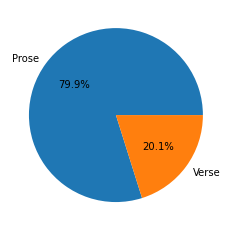

<Figure size 432x288 with 0 Axes>

In [51]:
plt.pie(numsg, labels=labels, autopct='%1.1f%%')
plt.show()
plt.savefig('/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/Images/pv_glad_split.png')

In [52]:
print(len(ferrum[ferrum['style']=='prose'])/len(ferrum)*100)
print(len(ferrum[ferrum['style']=='verse'])/len(ferrum)*100)
#here there's more in the prose category

66.95464362850973
33.04535637149028


In [53]:
p_f = len(ferrum[ferrum['style']=='prose'])/len(latlib_df)*100
v_f = len(ferrum[ferrum['style']=='verse'])/len(latlib_df)*100
labels = "Prose", "Verse"
numsf = [p_f, v_f]

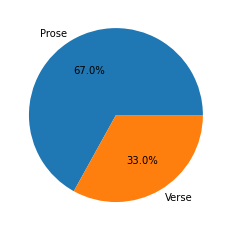

In [54]:
plt.pie(numsf, labels=labels, autopct='%1.1f%%')
plt.savefig('/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/Images/pv_fer_split.png')

In [55]:
print(len(mucro[mucro['style']=='prose'])/len(mucro)*100)
print(len(mucro[mucro['style']=='verse'])/len(mucro)*100)
#it's closer here, but still in favor of prose

65.55555555555556
34.44444444444444


In [56]:
p_m = len(mucro[mucro['style']=='prose'])/len(latlib_df)*100
v_m = len(mucro[mucro['style']=='verse'])/len(latlib_df)*100
labels = "Prose", "Verse"
numsm = [p_m, v_m]

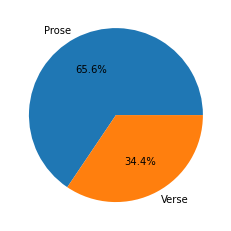

In [57]:
plt.pie(numsm, labels=labels, autopct='%1.1f%%')
plt.savefig('/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/Images/pv_muc_split.png')

In [58]:
print(len(ensis[ensis['style']=='prose'])/len(ensis)*100)
print(len(ensis[ensis['style']=='verse'])/len(ensis)*100)
#heavily in favor of prose

70.90592334494772
29.094076655052266


In [59]:
p_e = len(ensis[ensis['style']=='prose'])/len(latlib_df)*100
v_e = len(ensis[ensis['style']=='verse'])/len(latlib_df)*100
labels = "Prose", "Verse"
numse = [p_e, v_e]

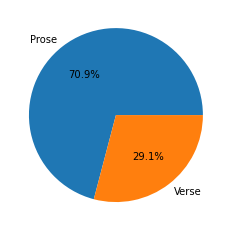

In [60]:
plt.pie(numse, labels=labels, autopct='%1.1f%%')
plt.savefig('/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/Images/pv_en_split.png')

In [61]:
print(len(capulus[capulus['style']=='prose'])/len(capulus)*100)
print(len(capulus[capulus['style']=='verse'])/len(capulus)*100)
#interestingly enough, verse is more popular than prose here

39.58333333333333
60.416666666666664


In [62]:
p_c = len(capulus[capulus['style']=='prose'])/len(latlib_df)*100
v_c = len(capulus[capulus['style']=='verse'])/len(latlib_df)*100
labels = "Prose", "Verse"
numsc = [p_c, v_c]

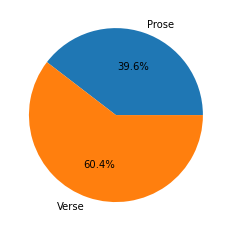

In [63]:
plt.pie(numsc, labels=labels, autopct='%1.1f%%')
plt.savefig('/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/Images/pv_cap_split.png')

because the results are overwhelmingly in favor of prose in most categories let's look at how they match up in latlib_df

In [64]:
print(len(latlib_df[latlib_df['style']=='prose']))
print(len(latlib_df[latlib_df['style']=='verse']))
#so prose definitely shows more than verse, which is not super surprising

426
185


In [65]:
p_n = len(latlib_df[latlib_df['style']=='prose'])/len(latlib_df)*100
v_n = len(latlib_df[latlib_df['style']=='verse'])/len(latlib_df)*100
print('percentage of prose works in data: ',p_n,'%')
print('percentage of verse works in data: ',v_n,'%')

percentage of prose works in data:  69.72176759410802 %
percentage of verse works in data:  30.27823240589198 %


In [66]:
"""
gladius.term = ['gladius' for x in gladius.term]
ferrum.term = ['ferrum' for x in ferrum.term]
mucro.term = ['mucro' for x in mucro.term]
ensis.term = ['ensis' for x in ensis.term]
capulus.term = ['capulus' for x in capulus.term]
"""

"\ngladius.term = ['gladius' for x in gladius.term]\nferrum.term = ['ferrum' for x in ferrum.term]\nmucro.term = ['mucro' for x in mucro.term]\nensis.term = ['ensis' for x in ensis.term]\ncapulus.term = ['capulus' for x in capulus.term]\n"

In [67]:
ensis.head(5)

,title,text,text_raw,tokens,token_count,max_line_length,style,author,life_span,era
0,Seneca the Elder,L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERSI...,[L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERS...,"[L, ANNAEI, SENECAE, MAIORIS, EXCERPTA, CONTRO...",1768,2045,prose,L. ANNAEVS SENECA MAI,54 B.C. – 39 A.D. MAI,Gold and Silver Ages
1,Tibullus Book III,LIBER TERTIVS LYGDAMI ALIORVMQUE ELEGIAE Mar...,"[LIBER TERTIVS LYGDAMI ALIORVMQUE ELEGIAE, \n,...","[LIBER, TERTIVS, LYGDAMI, ALIORVMQUE, ELEGIAE,...",4395,70,verse,none,none,none
2,Tibullus Book II,A. TIBVLLI ELEGIAE LIBER SECVNDVS Quisquis a...,"[A. TIBVLLI ELEGIAE LIBER SECVNDVS, \n, \n, \n...","[A, TIBVLLI, ELEGIAE, LIBER, SECVNDVS, Quisqui...",2747,56,verse,ALBIVS TIBVLL,c. 54 – 19 B.C.,Golden Age
4,Statius: Achilleid II,PVBLIVS PAPINIVS STATIVS ACHILLEID II Exuit im...,"[PVBLIVS PAPINIVS STATIVS, \nACHILLEID II\n, \...","[PVBLIVS, PAPINIVS, STATIVS, ACHILLEID, II, Ex...",1075,71,verse,PVBLIVS PAPINIVS STATI,c. 45 – 96 A.D.,Silver Age
5,Tibullus Book I,A. TIBVLLI ELEGIAE LIBER PRIMVS D...,"[A. TIBVLLI ELEGIAE LIBER PRIMVS, \n, , , ...","[A, TIBVLLI, ELEGIAE, LIBER, PRIMVS, Divitias,...",5237,120,prose,ALBIVS TIBVLL,c. 54 – 19 B.C.,Golden Age


In [68]:
df_swords = pd.concat([gladius, ferrum, mucro, ensis, capulus])

In [69]:
df_swords.sample(5)

,title,text,text_raw,tokens,token_count,max_line_length,style,author,life_span,era
616,P. VERGILI MARONIS AENEIDOS LIBER QVINTVS,P. VERGILI MARONIS AENEIDOS LIBER QVINTVS Int...,"[P. VERGILI MARONIS AENEIDOS LIBER QVINTVS\n, ...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, QVINTVS...",5565,72,verse,P. VERGILIVS MA,70 – 19 B.C.,Golden Age
381,Justin XL,HISTORIARUM PHILIPPICARUM IN EPITOMEN REDACTI ...,[HISTORIARUM PHILIPPICARUM IN EPITOMEN REDACTI...,"[HISTORIARUM, PHILIPPICARUM, IN, EPITOMEN, RED...",231,284,prose,TITVS LVCRETIVS CAR,c. 94 – c. 49 B.C.,Golden Age
331,Auli Gellii Noctes Atticae: Liber XII,AVLI GELLI NOCTES ATTICAE: LIBER XII I Dissert...,"[AVLI GELLI NOCTES ATTICAE: LIBER XII\n, \nI D...","[AVLI, GELLI, NOCTES, ATTICAE, LIBER, XII, I, ...",4707,5302,prose,AVLVS GELLI,c. A.D. 125 – after 180,Later
149,Seneca: On Anger II,L. ANNAEI SENECAE AD NOVATVM DE IRA LIBER II ...,[L. ANNAEI SENECAE AD NOVATVM DE IRA LIBER II\...,"[L, ANNAEI, SENECAE, AD, NOVATVM, DE, IRA, LIB...",3132,1940,prose,L. ANNAEVS SENE,c. 4 B.C. – A.D. 65,Gold and Silver Ages
303,Cicero: Pro Sulla,M. TVLLI CICERONIS PRO SVLLA ORATIO ...,"[M. TVLLI CICERONIS PRO SVLLA ORATIO\n, \n, \...","[M, TVLLI, CICERONIS, PRO, SVLLA, ORATIO, Maxi...",9311,1103,prose,M. TVLLIVS CICE,106 – 43 B.C.,Golden Age


In [70]:
print('gladius era variance: ', len(set([x for x in gladius['life_span']])))
print('ferrum era variance: ',len(set([x for x in ferrum['life_span']])))
print('mucro era variance: ',len(set([x for x in mucro['life_span']])))
print('ensis era variance: ',len(set([x for x in ensis['life_span']])))
print('capulus era variance: ',len(set([x for x in capulus['life_span']]))) #capulus has the least amount of era variance, lets take a look!

gladius era variance:  22
ferrum era variance:  27
mucro era variance:  17
ensis era variance:  28
capulus era variance:  13


In [71]:
print((set([x for x in capulus['era']]))) #covers all the bases! let's look at exact years...
print((set([x for x in capulus['life_span']])))
#pretty large span of time too, from the 2nd century BC to the 4th century AD!
#however, the majority of usage comes from after the year 0

{'none', 'Gold and Silver Ages', 'Later', 'Silver Age', 'Golden Age'}
{' 25/6 – 101 A.D. ', ' 43 B.C. – 17 A.D. ', ' 116 – 27 B.C. ', 'none', ' 4th century A.D. ', ' c. 56 – c. 117 A.D. ', ' 106 – 43 B.C. ', ' c. 45 – 96 A.D. ', ' 70 – 19 B.C. ', ' 63 – c. 113 A.D.  SECVND', ' born c. 254 B.C. ', ' c. 4 B.C. – A.D. 65 ', ' 54 B.C. – 39 A.D.  MAI'}


Below lets look at era usages for "capulus" and "gladius"

In [72]:
labels = "Golden Age", "Silver Age", "Later", "Gold and Silver Ages"
G = len(capulus[capulus.era=='Golden Age'])
S = len(capulus[capulus.era=='Silver Age'])
L = len(capulus[capulus.era=='Later'])
GaS = len(capulus[capulus.era=='Gold and Silver Ages'])
nums = [G, S, L, GaS]

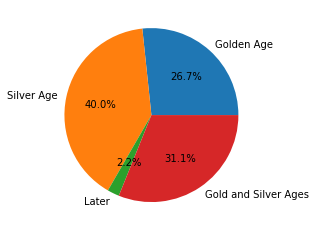

<Figure size 432x288 with 0 Axes>

In [73]:
plt.pie(nums, labels=labels, autopct='%1.1f%%')
plt.show()
plt.savefig('/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/Images/cap_era_split.png')

In [74]:
labels = "Golden Age", "Silver Age", "Later", "Gold and Silver Ages"
G = len(gladius[gladius.era=='Golden Age'])
S = len(gladius[gladius.era=='Silver Age'])
L = len(gladius[gladius.era=='Later'])
GaS = len(gladius[gladius.era=='Gold and Silver Ages'])
nums = [G, S, L, GaS]

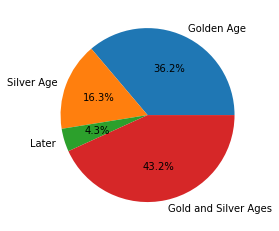

<Figure size 432x288 with 0 Axes>

In [75]:
plt.pie(nums, labels=labels, autopct='%1.1f%%')
plt.show()
plt.savefig('/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/Images/glad_era_split.png')

for ferrum, ensis, and mucro I'll save those to the "Images" file:

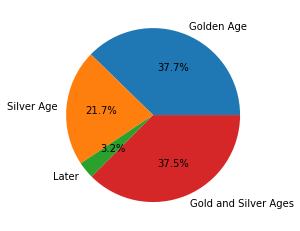

In [76]:
labels = "Golden Age", "Silver Age", "Later", "Gold and Silver Ages"
G = len(ferrum[ferrum.era=='Golden Age'])
S = len(ferrum[ferrum.era=='Silver Age'])
L = len(ferrum[ferrum.era=='Later'])
GaS = len(ferrum[ferrum.era=='Gold and Silver Ages'])
nums = [G, S, L, GaS]
plt.pie(nums, labels=labels, autopct='%1.1f%%')
plt.savefig('/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/Images/ferr_era_split.png')

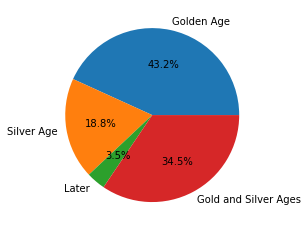

In [77]:
labels = "Golden Age", "Silver Age", "Later", "Gold and Silver Ages"
G = len(ensis[ensis.era=='Golden Age'])
S = len(ensis[ensis.era=='Silver Age'])
L = len(ensis[ensis.era=='Later'])
GaS = len(ensis[ensis.era=='Gold and Silver Ages'])
nums = [G, S, L, GaS]
plt.pie(nums, labels=labels, autopct='%1.1f%%')
plt.savefig('/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/Images/en_era_split.png')

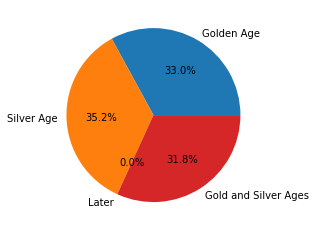

In [78]:
labels = "Golden Age", "Silver Age", "Later", "Gold and Silver Ages"
G = len(mucro[mucro.era=='Golden Age'])
S = len(mucro[mucro.era=='Silver Age'])
L = len(mucro[mucro.era=='Later'])
GaS = len(mucro[mucro.era=='Gold and Silver Ages'])
nums = [G, S, L, GaS]
plt.pie(nums, labels=labels, autopct='%1.1f%%')
plt.savefig('/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/Images/muc_era_split.png')

In [79]:
#lets look through author usages now:
print(set(df_swords.author))#all the authors that use a sword word
print(len(set(df_swords.author))) #that would be all 31, according to the set difference check below

{'M. TERENTIVS VAR', 'none', 'C. SALLVSTIVS CRISP', 'P. OVIDIVS NA', 'P. CORNELIVS TACIT', 'C. PETRONI', 'SILIVS ITALIC', 'C. IULIUS CAES', 'SEXTVS PROPERTI', 'C. PLINIVS CAECILIVS SECVND', 'P. VERGILIVS MA', 'L. ANNAEVS SENECA MAI', 'FLOR', 'T. LIVI', 'P. TERENTIVS AF', 'CORNELIVS NEP', 'PHAEDR', 'M. VITRVVIVS POLL', 'C. SVETONIVS TRANQVILL', 'M. TVLLIVS CICE', 'AVLVS GELLI', 'M. FABIVS QVINTILIAN', 'T. MACCIVS PLAVT', 'SCRIPTORES HISTORIAE AVGVST', 'PVBLIVS PAPINIVS STATI', 'TITVS LVCRETIVS CAR', 'M. PORCIVS CATO CENS', 'GAIVS VALERIVS FLACC', 'L. ANNAEVS SENE', 'EVTROPI', 'ALBIVS TIBVLL'}
31


In [80]:
x = set(df_swords.author)
y = set(latlib_df.author)
z = x.difference(y)
print(z) #yep, every author uses a sword word in at least one work!

set()


lets look at some sword word ngrams: 

In [81]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [83]:
for x in df_swords.tokens:
    bigram = list(nltk.bigrams(x))
    word_fd = nltk.FreqDist(x)
    bigram_fd = nltk.FreqDist(nltk.bigrams(x))
    trigram_fd = nltk.FreqDist(nltk.trigrams(x))
    finder = BigramCollocationFinder(word_fd, bigram_fd)
    finder = TrigramCollocationFinder.from_words(x)
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    sorted(bigram for bigram, score in scored)
    

In [84]:
for x in gladius.tokens:
    bigram = list(nltk.bigrams(x))
    word_fd = nltk.FreqDist(x)
    bigram_fd = nltk.FreqDist(nltk.bigrams(x))
    trigram_fd = nltk.FreqDist(nltk.trigrams(x))
    finder = BigramCollocationFinder(word_fd, bigram_fd)
    finder = TrigramCollocationFinder.from_words(x)
    scored_b = finder.score_ngrams(bigram_measures.raw_freq)
    sorted(bigram for bigram, score in scored)
    glad_b = [(gram, bigram_fd[gram]) for gram in bigram_fd if gram[0] == 'gladius' or gram[0] == 'gladii' or gram[0] == 'gladi' or gram[0] == 'gladio' or gram[0] == 'gladium' or gram[0] == 'gladie' or gram[0] == 'gladiorum' or gram[0] == 'gladiis' or gram[0] == 'gladios' or gram[1] == 'gladius' or gram[1] == 'gladii' or gram[1] == 'gladi' or gram[1] == 'gladio' or gram[1] == 'gladium' or gram[1] == 'gladie' or gram[1] == 'gladiorum' or gram[1] == 'gladiis' or gram[1] == 'gladios']
    glad_t = [(gram, trigram_fd[gram]) for gram in trigram_fd if gram[1] == 'gladius' or gram[1] == 'gladii' or gram[1] == 'gladi' or gram[1] == 'gladio' or gram[1] == 'gladium' or gram[1] == 'gladie' or gram[1] == 'gladiorum' or gram[1] == 'gladiis' or gram[1] == 'gladios']
    #print(glad_b)
   # print(glad_t)

In [85]:
for x in ferrum.tokens:
    bigram = list(nltk.bigrams(x))
    word_fd = nltk.FreqDist(x)
    bigram_fd = nltk.FreqDist(nltk.bigrams(x))
    trigram_fd = nltk.FreqDist(nltk.trigrams(x))
    finder = BigramCollocationFinder(word_fd, bigram_fd)
    finder = TrigramCollocationFinder.from_words(x)
    scored_b = finder.score_ngrams(bigram_measures.raw_freq)
    sorted(bigram for bigram, score in scored)
    ferr_b = [(gram, bigram_fd[gram]) for gram in bigram_fd if gram[0] == 'ferrum' or gram[0] == 'ferri' or gram[0] == 'ferro' or gram[0] == 'ferra' or gram[0] == 'ferrorum' or gram[0] == 'ferris']
    ferr_t = [(gram, trigram_fd[gram]) for gram in trigram_fd if gram[1] == 'ferrum' or gram[1] == 'ferri' or gram[1] == 'ferro' or gram[1] == 'ferra' or gram[1] == 'ferrorum' or gram[1] == 'ferris']
    #print(ferr_b)
    #print(ferr_t)

In [86]:
for x in mucro.tokens:
    bigram = list(nltk.bigrams(x))
    word_fd = nltk.FreqDist(x)
    bigram_fd = nltk.FreqDist(nltk.bigrams(x))
    trigram_fd = nltk.FreqDist(nltk.trigrams(x))
    finder = BigramCollocationFinder(word_fd, bigram_fd)
    finder = TrigramCollocationFinder.from_words(x)
    scored_b = finder.score_ngrams(bigram_measures.raw_freq)
    sorted(bigram for bigram, score in scored)
    muc_b = [(gram, bigram_fd[gram]) for gram in bigram_fd if gram[0] == 'mucro' or gram[0] == 'mucronis' or gram[0] == 'mucroni' or gram[0] == 'mucronem' or gram[0] == 'mucrone' or gram[0] == 'mucrones' or gram[0] == 'mucronum' or gram[0] == 'mucronibus']
    muc_t = [(gram, trigram_fd[gram]) for gram in trigram_fd if gram[1] == 'mucro' or gram[1] == 'mucronis' or gram[1] == 'mucroni' or gram[1] == 'mucronem' or gram[1] == 'mucrone' or gram[1] == 'mucrones' or gram[1] == 'mucronum' or gram[1] == 'mucronibus']
    #print(muc_b)
    #print(muc_t)

In [87]:
for x in ensis.tokens:
    bigram = list(nltk.bigrams(x))
    word_fd = nltk.FreqDist(x)
    bigram_fd = nltk.FreqDist(nltk.bigrams(x))
    trigram_fd = nltk.FreqDist(nltk.trigrams(x))
    finder = BigramCollocationFinder(word_fd, bigram_fd)
    finder = TrigramCollocationFinder.from_words(x)
    scored_b = finder.score_ngrams(bigram_measures.raw_freq)
    sorted(bigram for bigram, score in scored)
    en_b = [(gram, bigram_fd[gram]) for gram in bigram_fd if gram[0] == 'ensis' or gram[0] == 'ensi' or gram[0] == 'ensem' or gram[0] == 'ense' or gram[0] == 'enses' or gram[0] == 'ensium' or gram[0] == 'ensibus']
    en_t = [(gram, trigram_fd[gram]) for gram in trigram_fd if gram[1] == 'ensis' or gram[1] == 'ensi' or gram[1] == 'ensem' or gram[1] == 'ense' or gram[1] == 'enses' or gram[1] == 'ensium' or gram[1] == 'ensibus']
    #print(en_b)
    #print(en_t)

In [88]:
for x in capulus.tokens:
    bigram = list(nltk.bigrams(x))
    word_fd = nltk.FreqDist(x)
    bigram_fd = nltk.FreqDist(nltk.bigrams(x))
    trigram_fd = nltk.FreqDist(nltk.trigrams(x))
    finder = BigramCollocationFinder(word_fd, bigram_fd)
    finder = TrigramCollocationFinder.from_words(x)
    scored_b = finder.score_ngrams(bigram_measures.raw_freq)
    sorted(bigram for bigram, score in scored)
    cap_b = [(gram, bigram_fd[gram]) for gram in bigram_fd if gram[0] == 'capulus' or gram[0] == 'capuli' or gram[0] == 'capulo' or gram[0] == 'capulum' or gram[0] == 'capulorum' or gram[0] == 'capulis' or gram[0] == 'capulos']
    cap_t = [(gram, trigram_fd[gram]) for gram in trigram_fd if gram[1] == 'capulus' or gram[1] == 'capuli' or gram[1] == 'capulo' or gram[1] == 'capulum' or gram[1] == 'capulorum' or gram[1] == 'capulis' or gram[1] == 'capulos']
    #print(cap_b)
    #print(cap_t)

some note on reoccuring ngrams:
prepositions or other words that might be considered "stop words" appear a lot

('gladiis', 'obtruncabant') kill--some form of this word occurs with the other sword words as well
('gladius', 'cruentatus') bloody

('destrictis', 'gladiis')--verbal form to draw (sword), adj. rigid/uncmpromising


('Pharsalica', 'gladius', 'agebat') drive/urge


('ferro', 'vulneratus') wound/injure
('ferro', 'flammaque') blaze/flaming
interesting--('propensioris', 'ferri', 'non') "more favorable" "sword" "not"

('mucro', 'petebat') attack/aim at
('ille', 'mucro', 'petebat') that sword was aimed at
forms of fero, ferre, tuli, latus (carry/bear) are common

ensis w/ pectus ("chest")
('ense', 'metit') cut off
('ense', 'Getes') a proper noun--Thracian tribe

('capulo', 'tenus') to the extent (clearly these don't go together but are in a common construction)
    - ('lateri', 'capulo', 'tenus') shows that this is true--the first word is from fero, ferri, tuli, latus meaning "carry" or "bear"
('capulo', 'manum') hand
('capulis', 'hastisque') (and) spear--que being a post-positive enclitic for "and"

## final stat overview & save updated examples out:

In [89]:
latlib_df.describe()

,token_count,max_line_length
count,611.000000,611.000000
mean,5808.646481,1315.751227
std,4510.628184,1845.530913
min,77.000000,51.000000
25%,2314.500000,77.000000
50%,5026.000000,650.000000
75%,7664.000000,1996.000000
max,30592.000000,20845.000000


In [90]:
#updated data samples so they reflect my current data:
examples = latlib_df.head(10)
examples.to_pickle("/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/data_samples/examples.pkl")